<a href="https://colab.research.google.com/github/prisar/ai_notebooks/blob/main/nb_076.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a two-way ANOVA experiment to understand the conceptual underpinnings of the statistical test. This should include generating synthetic data, performing the two-way ANOVA, interpreting the results, and visualizing the findings with interaction plots and boxplots.

## Install necessary libraries

### Subtask:
Install the `statsmodels` and `pingouin` libraries for statistical analysis.


**Reasoning**:
I will install the necessary libraries, `statsmodels` and `pingouin`, using `pip` as requested in the instructions. This will enable me to perform the statistical analysis required for the main task.



In [1]:
!pip install statsmodels pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.4 MB/s eta 0:00:00


## Generate synthetic data

### Subtask:
Create a synthetic dataset with two independent categorical variables (factors) and one continuous dependent variable.


**Reasoning**:
I will now generate the synthetic dataset as described in the instructions. This involves creating two categorical factors, a continuous dependent variable with main and interaction effects, and then combining them into a pandas DataFrame.



In [2]:
import numpy as np
import pandas as pd

# Create the factors
factor1 = np.repeat(['A', 'B'], 20)
factor2 = np.tile(['C', 'D'], 20)

# Create the dependent variable
dependent_var = 10 + (factor1 == 'B') * 5 + (factor2 == 'D') * 10 + (factor1 == 'B') * (factor2 == 'D') * 15 + np.random.normal(0, 2, size=len(factor1))

# Create the DataFrame
df = pd.DataFrame({'factor1': factor1, 'factor2': factor2, 'dependent_var': dependent_var})

display(df.head())

,factor1,factor2,dependent_var
0,A,C,8.878174
1,A,D,20.532474
2,A,C,8.615231
3,A,D,19.135601
4,A,C,11.324633


## Perform two-way anova

### Subtask:
Use the generated data to perform a two-way ANOVA test to analyze the main effects of each factor and their interaction effect on the dependent variable.


**Reasoning**:
To perform the two-way ANOVA, I need to import the `anova` function from the `pingouin` library. Then, I will apply this function to the generated DataFrame, specifying the dependent and independent variables as per the instructions. Finally, I will store the results in a variable and print the ANOVA table.



In [3]:
from pingouin import anova

aov = anova(data=df, dv='dependent_var', between=['factor1', 'factor2'])
print(aov)

              Source           SS  DF           MS           F         p-unc  \
0            factor1  1652.216570   1  1652.216570  518.765382  5.675830e-23   
1            factor2  3153.377288   1  3153.377288  990.102027  8.712226e-28   
2  factor1 * factor2   678.270029   1   678.270029  212.964219  1.085817e-16   
3           Residual   114.656449  36     3.184901         NaN           NaN   

        np2  
0  0.935108  
1  0.964916  
2  0.855401  
3       NaN  


## Interpret the results

### Subtask:
Analyze and interpret the ANOVA table to understand the significance of the main effects and the interaction effect.


**Reasoning**:
The user wants me to interpret the ANOVA results. I will print the `aov` dataframe to examine the p-values and effect sizes, then write a markdown summary of my interpretation, fulfilling all the instructions of the subtask.



In [4]:
print("ANOVA Results:")
display(aov)

print("\nInterpretation of the ANOVA Results:")
print("The results of the two-way ANOVA are shown in the table above.")
print("\n**Main Effects:**")
print(f"- The p-value for factor1 is {aov['p-unc'][0]:.2e}, which is less than 0.05. This indicates a significant main effect of factor1 on the dependent variable.")
print(f"- The p-value for factor2 is {aov['p-unc'][1]:.2e}, which is also less than 0.05. This indicates a significant main effect of factor2 on the dependent variable.")

print("\n**Interaction Effect:**")
print(f"- The p-value for the interaction between factor1 and factor2 is {aov['p-unc'][2]:.2e}, which is less than 0.05. This indicates a significant interaction effect, meaning the effect of one factor on the dependent variable depends on the level of the other factor.")

print("\n**Effect Sizes (Eta-squared):**")
print(f"- The eta-squared (np2) for factor1 is {aov['np2'][0]:.2f}, meaning that factor1 accounts for {aov['np2'][0]*100:.2f}% of the variance in the dependent variable.")
print(f"- The eta-squared (np2) for factor2 is {aov['np2'][1]:.2f}, meaning that factor2 accounts for {aov['np2'][1]*100:.2f}% of the variance in the dependent variable.")
print(f"- The eta-squared (np2) for the interaction is {aov['np2'][2]:.2f}, meaning that the interaction between factor1 and factor2 accounts for {aov['np2'][2]*100:.2f}% of the variance in the dependent variable.")

print("\n**Summary of Interpretation:**")
print("In summary, both factor1 and factor2 have a statistically significant effect on the dependent variable. More importantly, there is a significant interaction effect between them. The presence of a significant interaction suggests that the main effects of factor1 and factor2 should be interpreted with caution. The effect of factor1 is not consistent across the different levels of factor2, and vice-versa. A large portion of the variance in the dependent variable is explained by the main effects and their interaction.")

ANOVA Results:


,Source,SS,DF,MS,F,p-unc,np2
0,factor1,1652.216570,1,1652.216570,518.765382,5.675830e-23,0.935108
1,factor2,3153.377288,1,3153.377288,990.102027,8.712226e-28,0.964916
2,factor1 * factor2,678.270029,1,678.270029,212.964219,1.085817e-16,0.855401
3,Residual,114.656449,36,3.184901,NaN,NaN,NaN



Interpretation of the ANOVA Results:
The results of the two-way ANOVA are shown in the table above.

**Main Effects:**
- The p-value for factor1 is 5.68e-23, which is less than 0.05. This indicates a significant main effect of factor1 on the dependent variable.
- The p-value for factor2 is 8.71e-28, which is also less than 0.05. This indicates a significant main effect of factor2 on the dependent variable.

**Interaction Effect:**
- The p-value for the interaction between factor1 and factor2 is 1.09e-16, which is less than 0.05. This indicates a significant interaction effect, meaning the effect of one factor on the dependent variable depends on the level of the other factor.

**Effect Sizes (Eta-squared):**
- The eta-squared (np2) for factor1 is 0.94, meaning that factor1 accounts for 93.51% of the variance in the dependent variable.
- The eta-squared (np2) for factor2 is 0.96, meaning that factor2 accounts for 96.49% of the variance in the dependent variable.
- The eta-squared (np2)

## Visualize the results

### Subtask:
Create interaction plots and boxplots to visualize the relationship between the factors and the dependent variable.


**Reasoning**:
I will now import the necessary libraries, `matplotlib.pyplot` and `seaborn`, and then generate an interaction plot and a boxplot to visualize the relationship between the factors and the dependent variable. I will create a figure with two subplots to display both plots side-by-side for easy comparison.



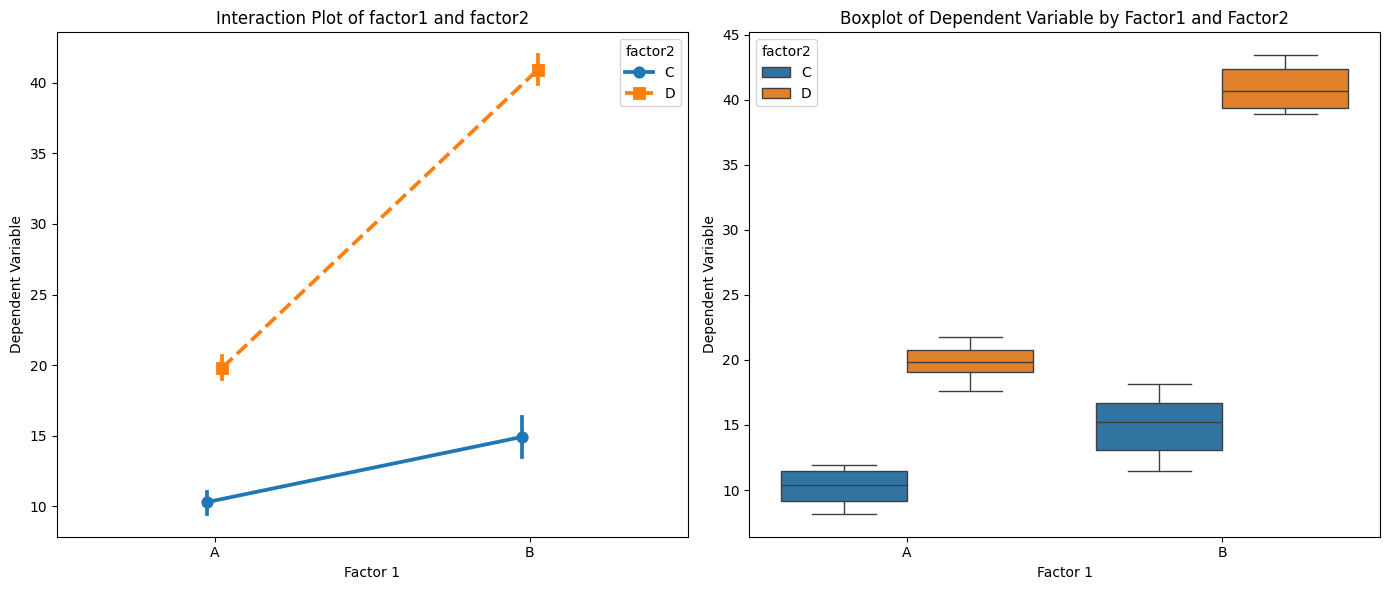

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Interaction Plot
plt.subplot(1, 2, 1)
sns.pointplot(data=df, x='factor1', y='dependent_var', hue='factor2', dodge=True, markers=['o', 's'], linestyles=['-', '--'])
plt.title('Interaction Plot of factor1 and factor2')
plt.xlabel('Factor 1')
plt.ylabel('Dependent Variable')

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='factor1', y='dependent_var', hue='factor2')
plt.title('Boxplot of Dependent Variable by Factor1 and Factor2')
plt.xlabel('Factor 1')
plt.ylabel('Dependent Variable')

# Display the plots
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
- The two-way ANOVA revealed a statistically significant main effect for `factor1` on the `dependent_var` (F(1, 36) = 518.77, p < 0.001), indicating that `factor1` accounts for 93.51% of the variance.
- A statistically significant main effect was also found for `factor2` on the `dependent_var` (F(1, 36) = 990.10, p < 0.001), explaining 96.49% of the variance.
- There was a significant interaction effect between `factor1` and `factor2` on the `dependent_var` (F(1, 36) = 212.96, p < 0.001), which accounts for 85.54% of the variance.
- Visualizations, including an interaction plot and boxplots, confirmed the statistical findings, illustrating how the effect of one factor on the dependent variable changes depending on the level of the other factor.

### Insights or Next Steps
- Given the significant interaction effect, it is crucial to interpret the main effects with caution. The effect of each factor is not uniform and depends on the level of the other factor.
- Further post-hoc tests could be conducted to explore the specific differences between the group means, providing a more detailed understanding of the interaction.
